In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training data
df = pd.read_csv("train.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

In [3]:
# Feature engineering
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek


In [4]:
# Drop unnecessary columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

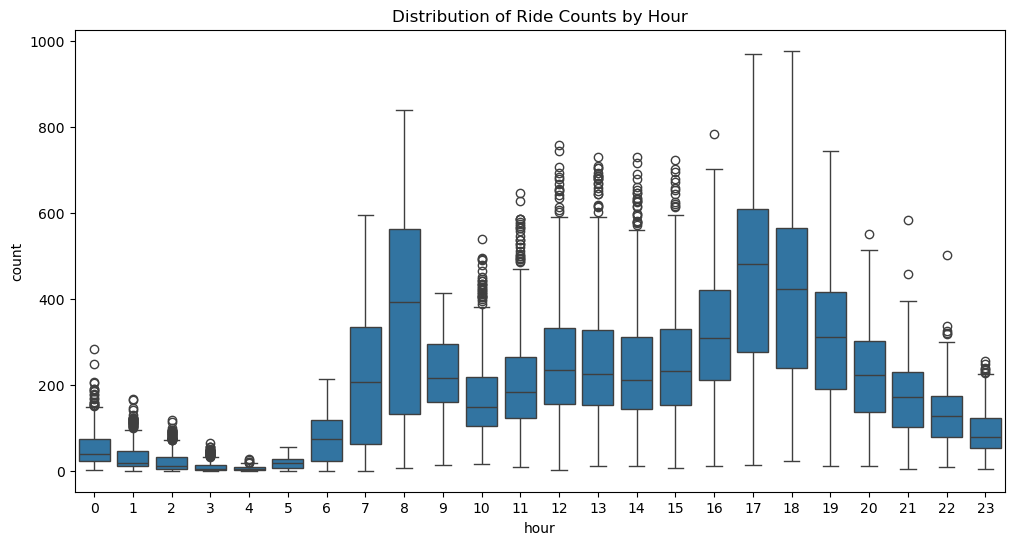

In [5]:
# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='count')
plt.title('Distribution of Ride Counts by Hour')
plt.show()

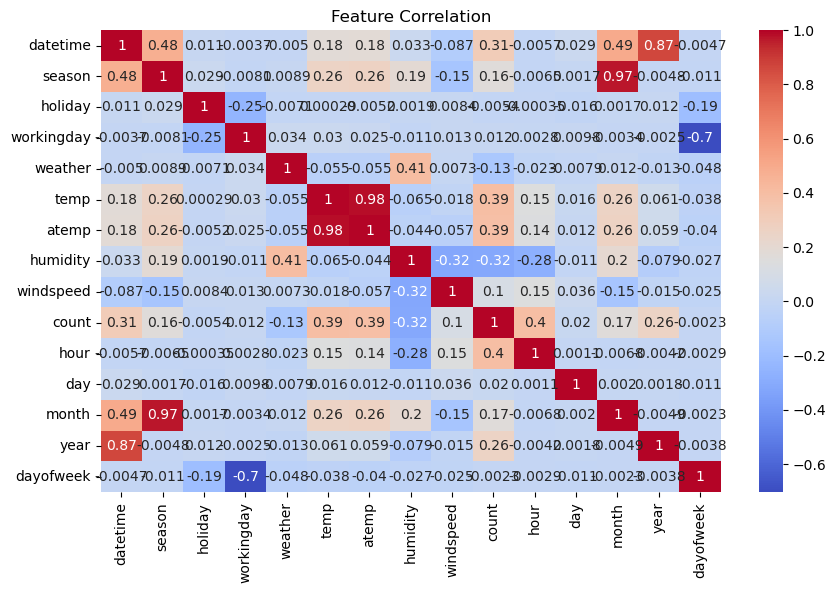

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
X = df[['hour', 'temp', 'humidity', 'windspeed', 'weather']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


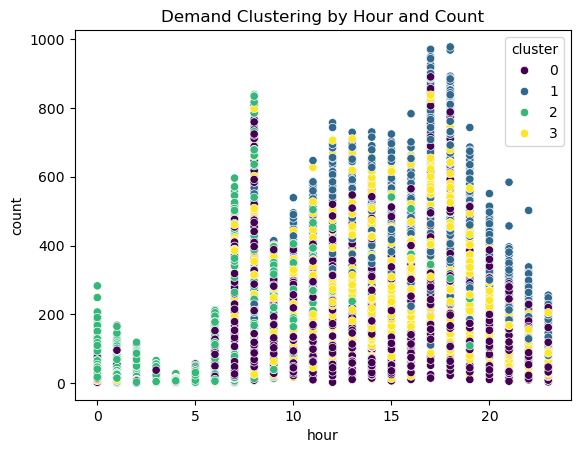

In [10]:
# Visualize clusters
sns.scatterplot(data=df, x='hour', y='count', hue='cluster', palette='viridis')
plt.title('Demand Clustering by Hour and Count')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
X = df.drop(['count', 'datetime'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Random Forest RMSE: {rmse}")

Random Forest RMSE: 38.7334315863156
